In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

%matplotlib inline
sns.set_style('darkgrid')
cf.go_offline()

In [3]:
df = pd.read_csv('udemy_courses.csv')

In [4]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [5]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [5]:
df.shape

(3678, 12)

In [6]:
df.info

<bound method DataFrame.info of       course_id                                       course_title  \
0       1070968                 Ultimate Investment Banking Course   
1       1113822  Complete GST Course & Certification - Grow You...   
2       1006314  Financial Modeling for Business Analysts and C...   
3       1210588  Beginner to Pro - Financial Analysis in Excel ...   
4       1011058       How To Maximize Your Profits Trading Options   
...         ...                                                ...   
3673     775618  Learn jQuery from Scratch - Master of JavaScri...   
3674    1088178  How To Design A WordPress Website With No Codi...   
3675     635248                      Learn and Build using Polymer   
3676     905096  CSS Animations: Create Amazing Effects on Your...   
3677     297602  Using MODX CMS to Build Websites: A Beginner's...   

                                                    url  is_paid  price  \
0     https://www.udemy.com/ultimate-investment-bank

In [7]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


# The aim for this project is to figure out consumer/subscirber trend for udemy courses, such as what type of courses attract the most subscriber, which one is the most profittable,etc.

# Exploratory section 1st step: Finding null values
as usual, we try to find which column and row contain null values, and either fill or drop the columns

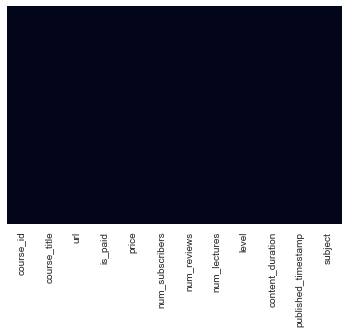

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [10]:
df[df.isnull()=='True'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            0 non-null      float64
 1   course_title         0 non-null      object 
 2   url                  0 non-null      object 
 3   is_paid              0 non-null      float64
 4   price                0 non-null      float64
 5   num_subscribers      0 non-null      float64
 6   num_reviews          0 non-null      float64
 7   num_lectures         0 non-null      float64
 8   level                0 non-null      object 
 9   content_duration     0 non-null      float64
 10  published_timestamp  0 non-null      object 
 11  subject              0 non-null      object 
dtypes: float64(7), object(5)
memory usage: 344.9+ KB


The heatmap above will show strip/tick for each column if there is any missing value.
Since it doesn't show any strip, this means that all rows for every column are filed, confirmed by calling info() for df and the result show 0 non-null

# Exploratory section 2nd step: Data analysis

# Courses Number per Subject

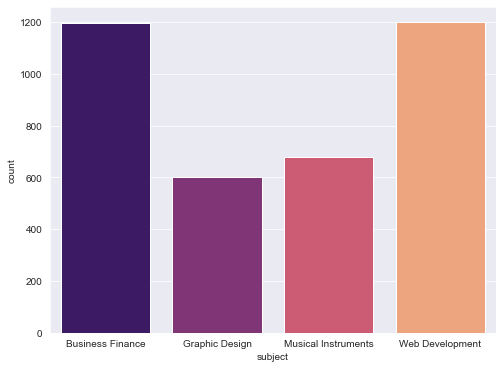

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(df['subject'], palette='magma')

The plot above shows that most of the courses in udemy are either about Web Development, or Business Finance. 

The versatility of learning to code by watching online tutorial and following along makes subject related to coding or programming such as WebDev more popular, which makes it profitable and an ideal side-income source for many developers.



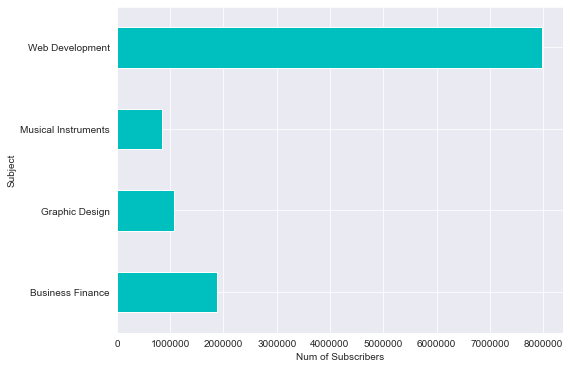

In [70]:
plt.figure(figsize=(8,6))
s = df.groupby('subject').sum()['num_subscribers']
s.plot(kind='barh', color='c')
plt.ylabel('Subject')
plt.xlabel('Num of Subscribers')
plt.ticklabel_format(axis='x', style='plain')
plt.show()

Despite having the same number of courses available as WebDev, Business and Finance number of subscribers is just 0.23 of what WebDev subject has. This would mean that per course, the ratio of subscribers for WebDev and Business Finance is as follows:

In [66]:
web_ratio = round((df[df['subject']=='Web Development']['num_subscribers'].sum()/df[df['subject']=='Web Development']['course_title'].count()))
bus_ratio = round((df[df['subject']=='Business Finance']['num_subscribers'].sum()/df[df['subject']=='Business Finance']['course_title'].count()))

def gcd(a,b):
    """ Greatest common divisor """
    while b!=0:
        r=a%b
        a,b=b,r
    return a

a= int(web_ratio/gcd(web_ratio,bus_ratio))
b= int(bus_ratio/gcd(web_ratio,bus_ratio))

print('Subscribers per course ratio for WebDev and Busfin:')
print(a, ':', b)

Subscribers per course ratio for WebDev and Busfin:
3325 : 782


The data also provided timestamp column which we can use to observe the growth for each subject in terms of number of subscribers and number of courses. This data will provide us an insight on when each subject started taking off.

In [77]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

In [94]:
subject = df['subject'].unique()
growth = df[['published_timestamp', 'subject']]
growth = growth.sort_values('published_timestamp')
time_series = growth['published_timestamp'].value_counts().reset_index()
time_series.columns = ['Date', 'Counts']
time_series['Cummulative'] = time_series['Counts'].cumsum()
dummies = pd.get_dummies(growth['subject'])

growth = growth.join(dummies)
growth['cum_busfin'] = growth['Business Finance'].cumsum()
growth['cum_grdes'] = growth['Graphic Design'].cumsum()
growth['cum_music'] = growth['Musical Instruments'].cumsum()
growth['cum_webdev'] = growth['Web Development'].cumsum()
growth_melt = growth.melt(id_vars='published_timestamp', value_vars=['cum_busfin', 'cum_grdes', 'cum_music', 'cum_webdev'])

In [131]:
fig = make_subplots(rows=1, cols=1 )
fig.append_trace(go.Scatter
                 (x=growth['published_timestamp'], y=growth['cum_busfin'],  
                  name='Business Finance',  line=dict(color="#345feb")
                 ), row=1, col=1)
fig.append_trace(go.Scatter
                 (x=growth['published_timestamp'], y=growth['cum_grdes'],  
                  name='Graphic Design', line=dict(color="#7deb34")
                 ), row=1, col=1)
fig.append_trace(go.Scatter
                 (x=growth['published_timestamp'], y=growth['cum_music'],  
                  name='Musical Instrument',line=dict(color="#eb5f34")
                 ), row=1, col=1)
fig.append_trace(go.Scatter
                 (x=growth['published_timestamp'], y=growth['cum_webdev'],  
                  name='Web Development', line=dict(color="#e8eb34")
                ), row=1, col=1)
fig['layout'].update(height=500, width=1000, title='Number of Courses Growth per Subject')
fig.show()

Now note some important milestones for Udemy:
1. Udemy was founded in 2010
2. in 2011, Udemy raised USD 3Million series A funding
3. in 2012, Udemy raised USD 12Million series B funding, bringing their total funding to USD 16Million and became a widely-known online courses platform (MOCC)
4. in 2013, Udemy released their ios app, increasing ease of learning for their subscibers
4. in 2014, Udemy released their android app, replaced their CEO, and raised USD 32Million Series C funding

In [137]:
milestones =pd.DataFrame({'published_timestamp':['2010-01-01', '2011-10-01', '2012-12-01', '2013-04-01', '2014-01-01'],
                         'milestones':['Founded', 'Series A funding', 'Series B funding', 'ios App launched', 'Android App launched']})
milestones['published_timestamp'] = pd.to_datetime(milestones['published_timestamp'], utc=True)
milestones.head()

,published_timestamp,milestones
0,2010-01-01 00:00:00+00:00,Founded
1,2011-10-01 00:00:00+00:00,Series A funding
2,2012-12-01 00:00:00+00:00,Series B funding
3,2013-04-01 00:00:00+00:00,ios App launched
4,2014-01-01 00:00:00+00:00,Android App launched


In [198]:
growth_merged = pd.merge(growth, milestones, on='published_timestamp', how='outer')

def milestone_values(col):
    milestone= col[0]
    
    if milestone=='Founded' or milestone=='Series A funding' or milestone=='Series B funding' or milestone=='ios App launched' or milestone=='Android App launched':
        return 0
    
growth_merged['milestone_value']=growth_merged[['milestones']].apply(milestone_values, axis=1)

Taking those milestones into account, we can see how courses growth progressed after each of those events took place

In [199]:
fig = make_subplots(rows=1, cols=1 )
fig.append_trace(go.Scatter
                 (x=growth_merged['published_timestamp'], y=growth_merged['cum_busfin'],  
                  name='Business Finance',  line=dict(color="#345feb")
                 ), row=1, col=1)
fig.append_trace(go.Scatter
                 (x=growth_merged['published_timestamp'], y=growth_merged['cum_grdes'],  
                  name='Graphic Design', line=dict(color="#7deb34")
                 ), row=1, col=1)
fig.append_trace(go.Scatter
                 (x=growth_merged['published_timestamp'], y=growth_merged['cum_music'],  
                  name='Musical Instrument',line=dict(color="#eb5f34")
                 ), row=1, col=1)
fig.append_trace(go.Scatter
                 (x=growth_merged['published_timestamp'], y=growth_merged['cum_webdev'],  
                  name='Web Development', line=dict(color="#e8eb34")
                ), row=1, col=1)
fig.append_trace(go.Scatter
                 (x=growth_merged[growth_merged['milestones']=='Founded']['published_timestamp'], 
                  y=growth_merged[growth_merged['milestones']=='Founded']['milestone_value'],
                  mode='markers',
                  name='Founded',
                  hovertext='Udemy was founded in 2010',
                  marker_size=10,
                ), row=1, col=1)
fig.append_trace(go.Scatter
                 (x=growth_merged[growth_merged['milestones']=='Series A funding']['published_timestamp'], 
                  y=growth_merged[growth_merged['milestones']=='Series A funding']['milestone_value'],
                  mode='markers',
                  name='Series A Funding',
                  hovertext='Udemy received Series A funding',
                  marker_size=10,
                ), row=1, col=1)
fig.append_trace(go.Scatter
                 (x=growth_merged[growth_merged['milestones']=='Series B funding']['published_timestamp'], 
                  y=growth_merged[growth_merged['milestones']=='Series B funding']['milestone_value'],
                  mode='markers',
                  name='Series B Funding',
                  hovertext='Udemy received Series B funding',
                  marker_size=10,
                ), row=1, col=1)
fig.append_trace(go.Scatter
                 (x=growth_merged[growth_merged['milestones']=='ios App launched']['published_timestamp'], 
                  y=growth_merged[growth_merged['milestones']=='ios App launched']['milestone_value'],
                  mode='markers',
                  name='ios App Launched',
                  hovertext='ios app launched to make learning more portable for ios users',
                  marker_size=10,
                ), row=1, col=1)
fig.append_trace(go.Scatter
                 (x=growth_merged[growth_merged['milestones']=='Android App launched']['published_timestamp'], 
                  y=growth_merged[growth_merged['milestones']=='Android App launched']['milestone_value'],
                  mode='markers',
                  name='Android App Launched',
                  hovertext='Android app launched to make learning more portable for android users',
                  marker_size=10,
                ), row=1, col=1)

fig['layout'].update(height=500, width=1000, title='Number of Courses Growth per Subject and Udemy Milestones Event')
fig.show()

We can see that Udemy number of courses started increasing greatly after they released their mobile App in 2013. This makes a lot of senses because these apps definitely makes learning more portable and easier, and at the very least made a buzz during their launch date. At the end, this whole process attracted more users, and in turn attracted more lecturers.

# Subject/Courses Prices and Profit Assumptions

Now let us try to get an insight on the top 10 most expensive courses for each subject and how much instructor/teaching organization makes.

Per udemy website, their profit sharing policies are:
1. For course promoted by instructor, instructor get 97% of profit
2. For organic subscription (without promotion), instructor get 50% of profit

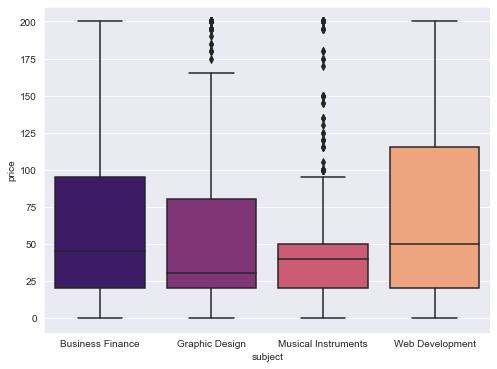

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(x='subject', y='price', data=df, palette='magma')

Bear in mind that the plot indicates that many courses from WebDev or BusFin subject will have the same price at the top price value (200 USD), while only several courses (outliers) from GraphicDesign and MusicalInstrument are priced at that value.

When displaying top 5 or top xx most expensive courses, most of them will have the same values since there are a lot of courses priced at 200 USD. This is not an ideal ways of displaying data, we should check which courses are the most profitable instead. But to show you what I mean, I will show the top 5 most expensive courses for all subject first.

In [221]:
print('Top 5 most expensive WebDev course (USD):')

idx = pd.IndexSlice
web_dev_pricey = df.loc[idx[df[df['subject']=='Web Development']['price'].sort_values(ascending=False).index]][['course_title', 'price', 'num_subscribers']]
web_dev_pricey['gross income'] = web_dev_pricey['price'] * web_dev_pricey['num_subscribers']
web_dev_pricey['organic_profit'] = web_dev_pricey['price'] * web_dev_pricey['num_subscribers']*0.5
web_dev_pricey['promotion_profit'] = web_dev_pricey['price'] * web_dev_pricey['num_subscribers']*0.97
web_dev_pricey.head(5)

Top 5 most expensive WebDev course (USD):


,course_title,price,num_subscribers,gross income,organic_profit,promotion_profit
3117,1 Hour JavaScript,200,22999,4599800,2299900.0,4461806.0
3233,Ultimate Web Designer & Developer Course: Buil...,200,33788,6757600,3378800.0,6554872.0
2751,Learning Path: Magento: Master and Test Magent...,200,155,31000,15500.0,30070.0
3245,The Most Comprehensive Web Development Course,200,333,66600,33300.0,64602.0
3129,WordPress: Create an Amazing Website With Ease,200,1109,221800,110900.0,215146.0


In [220]:
print('Top 5 most expensive Bus&Fin course (USD):')

idx = pd.IndexSlice
busfin_pricey = df.loc[idx[df[df['subject']=='Business Finance']['price'].sort_values(ascending=False).index]][['course_title', 'price', 'num_subscribers']]
busfin_pricey['gross income'] = busfin_pricey['price'] * busfin_pricey['num_subscribers']
busfin_pricey['organic_profit'] = busfin_pricey['price'] * busfin_pricey['num_subscribers']*0.5
busfin_pricey['promotion_profit'] = busfin_pricey['price'] * busfin_pricey['num_subscribers']*0.97
busfin_pricey.head(5)

Top 5 most expensive Bus&Fin course (USD):


,course_title,price,num_subscribers,gross income,organic_profit,promotion_profit
0,Ultimate Investment Banking Course,200,2147,429400,214700.0,416518.0
902,Intermediate Accounting 1: Easy. Fast. Simple!,200,90,18000,9000.0,17460.0
125,Stock market Investing Encyclopedia: How to in...,200,3143,628600,314300.0,609742.0
135,Complete Trading Plan Course for Stocks & Fore...,200,1087,217400,108700.0,210878.0
136,Forex Trading with Fixed 'Risk through Options...,200,611,122200,61100.0,118534.0


In [219]:
print('Top 5 most expensive Graphic&Design course (USD):')

idx = pd.IndexSlice
grdes_pricey = df.loc[idx[df[df['subject']=='Graphic Design']['price'].sort_values(ascending=False).index]][['course_title', 'price', 'num_subscribers']]
grdes_pricey['gross income'] = grdes_pricey['price'] * grdes_pricey['num_subscribers']
grdes_pricey['organic_profit'] = grdes_pricey['price'] * grdes_pricey['num_subscribers']*0.5
grdes_pricey['promotion_profit'] = grdes_pricey['price'] * grdes_pricey['num_subscribers']*0.97
grdes_pricey.head(5)

Top 5 most expensive Graphic&Design course (USD):


,course_title,price,num_subscribers,gross income,organic_profit,promotion_profit
1251,Canva : Graphic Design Theory Volume1,200,6975,1395000,697500.0,1353150.0
1758,Adobe Suite : Unleash your creativity & benefi...,200,1005,201000,100500.0,194970.0
1598,会声会影深度教学,200,3,600,300.0,582.0
1670,调色中级课程,200,5,1000,500.0,970.0
1654,Bestseller! Learn Photoshop in 1 Hour (No Expe...,200,5471,1094200,547100.0,1061374.0


In [218]:
print('Top 5 most expensive Musical course (USD):')

idx = pd.IndexSlice
music_pricey = df.loc[idx[df[df['subject']=='Musical Instruments']['price'].sort_values(ascending=False).index]][['course_title', 'price', 'num_subscribers']]
music_pricey['gross income'] = music_pricey['price'] * music_pricey['num_subscribers']
music_pricey['organic_profit'] = music_pricey['price'] * music_pricey['num_subscribers']*0.5
music_pricey['promotion_profit'] = music_pricey['price'] * music_pricey['num_subscribers']*0.97
music_pricey.head(5)

Top 5 most expensive Musical course (USD):


,course_title,price,num_subscribers,gross income,organic_profit,promotion_profit
2023,Guitar Chord Mastery!Turn Your Brain Into A Ch...,200,4133,826600,413300.0,801802.0
1988,Ultimate Beginner Guitar Masterclass,200,8113,1622600,811300.0,1573922.0
1986,"LEARN HARMONICA, amaze your friends and have f...",200,8857,1771400,885700.0,1718258.0
1993,Learn to Play Piano From a Concert Pianist - F...,200,3206,641200,320600.0,621964.0
1997,Learn How to Improvise on Guitar in 30 Days,200,1788,357600,178800.0,346872.0


See how we don't get a really informative insight when ordering by prices.
What about ordering by the most profitable courses?
(Assuming all courses are organic or without promotion)

In [262]:
webdev_mostprofit = web_dev_pricey.loc[idx[web_dev_pricey['organic_profit'].sort_values(ascending=False).index]][['course_title', 'organic_profit']]
print('Top 5 most profitable WebDev courses:')
webdev_mostprofit.head()

Top 5 most profitable WebDev course:


,course_title,organic_profit
3230,The Web Developer Bootcamp,12158400.0
3232,The Complete Web Developer Course 2.0,11451200.0
3204,Angular 4 (formerly Angular 2) - The Complete ...,7009385.0
3247,JavaScript: Understanding the Weird Parts,6966050.0
3251,Learn and Understand NodeJS,5675280.0


In [263]:
busfin_mostprofit = busfin_pricey.loc[idx[busfin_pricey['organic_profit'].sort_values(ascending=False).index]][['course_title', 'organic_profit']]
print('Top 5 most profitable Business and Finance courses:')
busfin_mostprofit.head()

Top 5 most profitable Business and Finance courses:


,course_title,organic_profit
40,The Complete Financial Analyst Course 2017,2386897.5
38,Beginner to Pro in Excel: Financial Modeling a...,2170057.5
44,Black Algo Trading: Build Your Trading Robot,2019500.0
36,Forex Trading A-Z™ - With LIVE Examples of For...,1647750.0
37,"Introduction to Finance, Accounting, Modeling ...",1144100.0


In [264]:
grdes_mostprofit = grdes_pricey.loc[idx[grdes_pricey['organic_profit'].sort_values(ascending=False).index]][['course_title', 'organic_profit']]
print('Top 5 most profitable Graphic Design courses:')
grdes_mostprofit.head()

Top 5 most profitable Graphic Design courses:


,course_title,organic_profit
1213,Photoshop for Entrepreneurs - Design 11 Practi...,3628800.0
1526,How To Make Graphics For A Website,2485700.0
1211,The Ultimate Drawing Course - Beginner to Adva...,2005650.0
1220,Canva Graphics Design for Entrepreneurs - Desi...,1830300.0
1210,Graphic Design Bootcamp,1527600.0


In [265]:
music_mostprofit = music_pricey.loc[idx[music_pricey['organic_profit'].sort_values(ascending=False).index]][['course_title', 'organic_profit']]
print('Top 5 most profitable Musical Instrument courses:')
music_mostprofit.head()

Top 5 most profitable Musical Instrument courses:


,course_title,organic_profit
1979,Pianoforall - Incredible New Way To Learn Pian...,7549900.0
1982,Complete Guitar System - Beginner to Advanced,2387787.5
1980,The Professional Guitar Masterclass,2170100.0
1986,"LEARN HARMONICA, amaze your friends and have f...",885700.0
1988,Ultimate Beginner Guitar Masterclass,811300.0


In [249]:
df_profit = df
df_profit['organic_profit'] = df['num_subscribers'] * df['price']*0.5
df_profit = df_profit.loc[idx[df_profit['organic_profit'].sort_values(ascending=False).index]][['course_title', 'subject', 'organic_profit']]

f=df_profit.head()
figs = make_subplots(rows=1, cols=1)
figs.append_trace(go.Bar(
    x=f['organic_profit'],
    y=f['course_title'],
    orientation='h',
    marker = dict(color=f['organic_profit'].values, coloraxis='coloraxis')
    ), row=1, col=1)
figs['layout'].update(height=600, width=1000, title='Top 5 Profitable Courses (in USD)')
figs.show()

Surprisingly, there is one Musical courses among the 5 most profitable courses on Udemy per 2017. The other four are from WebDev subject

# How big of a role does price plays?

In [256]:
split = df['is_paid'].value_counts().reset_index()
split.columns = ['Is Paid', 'Counts']
fig = px.pie(split, names='Is Paid', values='Counts', width=500)
fig['layout'].update(title='Paid/Free Course Pie Chart')
fig.show()

Most of the courses are paid course, but does it matter how much you set the price for your courses in order to maximize subscribers?

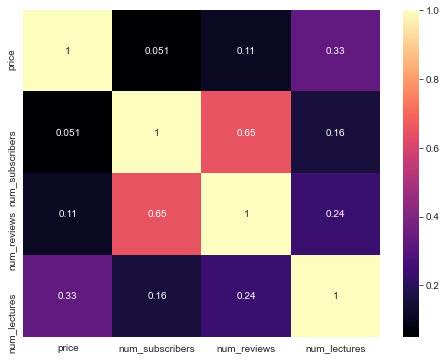

In [260]:
paycorr = df[['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'level']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(paycorr, cmap='magma', annot=True)

Interestingly, the correlation between price and number of subscribers for each course is very small (0.051). This could means that most users don't mind paying for a high price as long as the content meets their criteria. Udemy also offers 30-day refund should a user decides to do so.

# Most Popular and Engaging Course

We should be able to sort the most popular course either by number of subscribers, and the most engaging one by number of reviews. 

In [280]:
popular = df.loc[idx[df['num_subscribers'].sort_values(ascending=False).index]][['course_title', 'num_subscribers', 'subject']]
mostpop = popular.head(10)
engage = df.loc[idx[df['num_reviews'].sort_values(ascending=False).index]][['course_title', 'num_reviews', 'subject']]
mosten= engage.head(10)
fig = make_subplots(rows=2 ,cols=1, subplot_titles=('Most Popular Courses', 'Most Engaging Courses'))
fig.append_trace(go.Bar(x=mostpop['num_subscribers'], y=mostpop['course_title'],
                       orientation='h', 
                       showlegend=False), row=1, col=1)
fig.append_trace(go.Bar(x=mosten['num_reviews'], y=mosten['course_title'],
                       orientation='h', 
                       showlegend=False), row=2, col=1)
fig['layout'].update(height=700, width=800)
fig.show()

Pianoforall, the only Musical course in the Top 5 Most Profitable Course, also appears on Top 10 Most Engaging Course as the only course that isn't WebDev.

# Course Levels Importance

Did course levels matter back then? We can try to plot the number of course and subscribers per level to find out about it.

In [289]:
df_level = df[['level', 'num_subscribers', 'course_title']]
subs_level = df_level.groupby('level').sum().reset_index()
course_level = df_level.groupby('level').count().reset_index()

fig = make_subplots(rows=2 ,cols=1, subplot_titles=('Levels v Subscribers', 'Levels v Number of Courses'))
fig.append_trace(go.Bar(x=subs_level['num_subscribers'], y=subs_level['level'],
                       orientation='h', 
                       showlegend=False), row=1, col=1)
fig.append_trace(go.Bar(x=course_level['course_title'], y=course_level['level'],
                       orientation='h', 
                       showlegend=False), row=2, col=1)
fig['layout'].update(height=700, width=800)
fig.show()

Most of the courses are open for All level, then followed by Beginner Levels, Intermediate Level, and finally Expert Level, thus the Levels v Subscribers plot makes sense. But to actually see the effect of level to subscribers, we need to normalize the number of subscribers by number of courses per level.

In [307]:
norm_level = pd.DataFrame(subs_level['num_subscribers']/course_level['course_title'])
norm_level = pd.concat([subs_level['level'], norm_level], axis=1)
norm_level.columns = ['level', 'subs per course']

In [314]:
fig =px.bar(data_frame=norm_level,x='subs per course', y='level', color='level', title='Subs per Course v Level')
fig.show()

The plot still shows the same level rank as the other 2 plots before, but now with smaller margin between All Level Courses and Beginner Level Courses.

# Course Duration

It would make sense that higher level courses have longer duration than the other levels, wouldn't it?

In [313]:
fig=px.box(df, x='level', y='content_duration', color='level', title='Box Plot of Level v Content Duration')
fig.show()

Hovering on the plot gives us more detailed information. The median for course duration seems to be same over all levels. But my initial hypothesis seems to be false. Higher level courses seems to be mostly shorter than lower level courses. Could this means that as your level increases, your required time to comprehend the course decreases?

# Relation between variables 

This section will show how each column relates to each other

In [320]:
def level_category(cols):
    level=cols[0]
    
    if level =='All Levels':
        return 1
    elif level == 'Beginner Level':
        return 2
    elif level == 'Intermediate Level':
        return 3
    elif level == 'Expert level':
        return 4
    
df['level_category'] = df[['level']].apply(level_category, axis=1)

def ispaid(cols):
    ispaid  = cols[0]
    
    if ispaid ==True:
        return 1
    else:
        return 0
df['paid'] = df[['is_paid']].apply(ispaid, axis=1)


def subject_cat(cols):
    subject =cols[0]
    
    if subject == 'Web Development':
        return 1
    elif subject =='Business Finance':
        return 2
    elif subject =='Graphic Design':
        return 3
    else:
        return 4

df['subject_cat'] = df[['subject']].apply(subject_cat, axis=1)

df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,organic_profit,level_category,paid,subject_cat
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,214700.0,1.0,1,2
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,104700.0,1.0,1,2
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,48915.0,3.0,1,2
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,116422.5,1.0,1,2
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,127600.0,3.0,1,2


In [321]:
pairdata= df.drop(['course_id', 'course_title', 'url', 'is_paid', 'level', 'subject', 'published_timestamp'], axis=1)

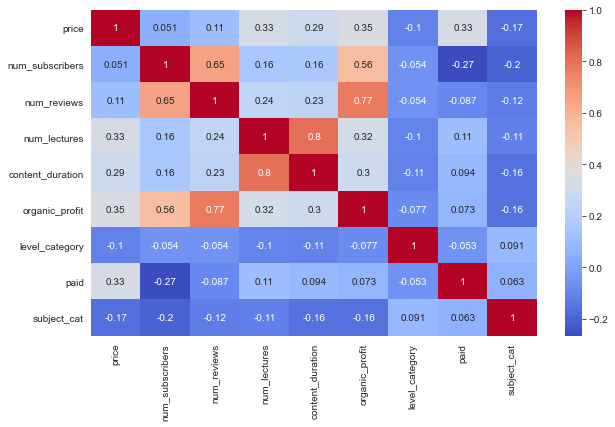

In [324]:
paircorr = pairdata.corr()
plt.figure(figsize=(10,6))
sns.heatmap(paircorr, cmap ='coolwarm', annot=True)

This heatmap shows the relation between each variables. Some of it are obvious, such as the 0.8 correlation between number of lectures and content_duration (more lectures means longer course, duh), and number of reviews with number of subscribers.

# Machine Learning Trial

I prefer Exploratory Data than Machine Learning, but I must say that I wanna know whether or not it is possible  to predict subscribers given the other variables.

In [383]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [345]:
pairdata.head()

,price,num_subscribers,num_reviews,num_lectures,content_duration,organic_profit,level_category,paid,subject_cat
0,200,2147,23,51,1.5,214700.0,1.0,1,2
1,75,2792,923,274,39.0,104700.0,1.0,1,2
2,45,2174,74,51,2.5,48915.0,3.0,1,2
3,95,2451,11,36,3.0,116422.5,1.0,1,2
4,200,1276,45,26,2.0,127600.0,3.0,1,2


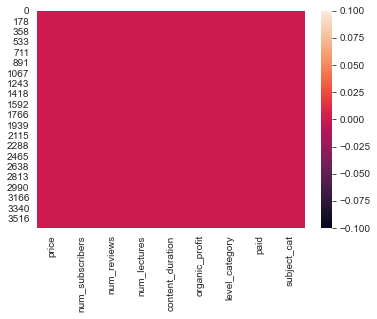

In [355]:
pairdata_fixed = pairdata
pairdata_fixed.dropna(inplace=True)

In [356]:
X = pairdata_fixed.drop(['organic_profit', 'num_subscribers'], axis=1)
y = pairdata_fixed['num_subscribers']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [357]:
linearmodel = LinearRegression()
linearmodel.fit(X_train, y_train)
linear_pred = linearmodel.predict(X_test)

In [380]:
linear_result = pd.DataFrame({'predicted_subs':linear_pred,
                          'actual_subs': y_test.reset_index()['num_subscribers']})
fig = px.scatter(linear_result, x='actual_subs', y='predicted_subs')
fig.show()

In [362]:
metrics.mean_absolute_error(y_test, linear_pred)

2674.691381669276

In [363]:
np.sqrt(metrics.mean_squared_error(y_test, linear_pred)) 

7909.067784449738

We could try using RandomForestRegressor too

In [384]:
rfor = RandomForestRegressor(n_estimators=500, random_state=101)
scaler = StandardScaler()

In [394]:
X = pairdata_fixed.drop(['organic_profit', 'num_subscribers'], axis=1)
y = pairdata_fixed['num_subscribers']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [395]:
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [396]:
rfor.fit(X_train, y_train)
rfor_pred = rfor.predict(X_test)

In [398]:
forest_result = pd.DataFrame({'predicted_subs':rfor_pred,
                          'actual_subs': y_test.reset_index()['num_subscribers']})
fig = px.scatter(forest_result, x='actual_subs', y='predicted_subs')
fig.show()

In [399]:
metrics.mean_absolute_error(y_test, rfor_pred)

2173.5787372954087

In [401]:
np.sqrt(metrics.mean_squared_error(y_test, rfor_pred)) 

7427.906694328821

Both models seem to not be the ideal model or fit to predict subscribers number, further data processing and feature selection is needed.

We could try to find out what variables determine the outcome the most

In [410]:
feature = pd.Series(rfor.feature_importances_, index=X.columns)

In [411]:
px.bar(x=feature.index, y=feature.values, labels={'x': 'Feature', 'y':'Importance Score'},
      color=feature.index,title='Feature Importance for RandomForestRegression')

In [415]:
print('Linear Regression Feature Importance Score:')
feature2= pd.Series(linearmodel.coef_, index=X.columns)
feature2

Linear Regression Feature Importance Score:


price                  5.588766
num_reviews            5.481691
num_lectures           5.111974
content_duration      15.722326
level_category      -236.332956
paid               -7931.698406
subject_cat         -908.957173
dtype: float64

For RandomForestRegression, number of reviews per course seems to be the most important feature, while for LinearRegression, it is content duration per course. Paid, Subject, and Level category seem to be not that important in both RandomForest and LinearRegression

# This is the ending line for this project. Any suggestions or critics are much appreciated.